### Importing Data Packages and Real Estate Datasets

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sb
from datetime import date
import pandas as pd
import numpy as np
Marin = pd.read_csv('Marin-1-2015.csv')
Sonoma = pd.read_csv('Sonoma-1-2015.csv')
Napa = pd.read_csv('Napa-1-2015.csv')
Mendocino = pd.read_csv('Mendocino-1-2015.csv')
# bringing in real estate data files by county

### Cleaning up column titles and merging the data sets together

In [2]:
Marin.columns = [i.lower().replace(' ','') for i in Marin.columns]
Napa.columns = [i.lower().replace(' ','') for i in Napa.columns]
Sonoma.columns = [i.lower().replace(' ','') for i in Sonoma.columns]
Mendocino.columns = [i.lower().replace(' ','') for i in Mendocino.columns]
#cleaning up column titles

In [124]:
Marin['county'] = 'Marin'
Napa['county'] = 'Napa'
Sonoma['county'] = 'Sonoma'
Mendocino['county'] = 'Mendocino'
#adding county column

MN = Marin.append(Napa,ignore_index=True)
MNS = MN.append(Sonoma,ignore_index=True)
MNSM = MNS.append(Mendocino,ignore_index=True)

#merging the datasets

print(len(Marin))
print(len(Napa))
print(len(MN))
print(len(Sonoma))
print(len(MNS))
print(len(Mendocino))
print(len(MNSM))

#confirming merge is done correctly

6095
3163
9258
9823
19081
1503
20584


In [126]:
MNSM.head().transpose()

,0,1,2,3,4
mlnumber,21320817,21411698,21412964,21413827,21315442
status,Sold,Sold,Sold,Sold,Sold
listprice,"1,050,000","865,000","1,125,000","549,000","4,495,000"
soldprice,"920,000","850,000","1,115,000","575,000","3,800,000"
listdate,9/9/13,5/19/14,6/4/14,6/9/14,7/8/13
solddate,3/4/15,4/10/15,3/27/15,3/27/15,4/10/15
expireddate,NaN,NaN,NaN,NaN,NaN
cumlativedom,523,299,264,44,631
address,30 Waikiki Ln,569 Oceana Dr,1715 Lincoln Ave,1110 Mission Ave #B,16 Old Landing Rd
cityname,Dillon Beach,Dillon Beach,San Rafael,San Rafael,Tiburon


### Dropping unnecessary columns and converting datatypes

In [4]:
MNSM = MNSM.drop(['3/4baths','1/4baths','expireddate','track','interior','subdivision','imagename','unitnumber','streetnumber2','occupantphone','occupantname','agentphone','agentemail','officephone','soldofficephone','age','mapcode'],axis=1)
#dropping some unneccessary columns
#

In [5]:
MNSM['listdate'] = pd.to_datetime(MNSM['listdate'])
MNSM['solddate'] = pd.to_datetime(MNSM['solddate'])
MNSM['pendingdate'] = pd.to_datetime(MNSM['pendingdate'])

# converting date data to datetime format
MNSM['soldprice'] = MNSM['soldprice'].str.replace(',', '')
MNSM['listprice'] = MNSM['listprice'].str.replace(',', '')

MNSM['soldprice'] = MNSM['soldprice'].convert_objects(convert_numeric=True)
MNSM['listprice'] = MNSM['listprice'].convert_objects(convert_numeric=True)

# converting non-null objects to integers





/Users/erikkrogh-jespersen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/Users/erikkrogh-jespersen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


### Adding some calculated columns and removing some outliers or errant data

In [75]:
MNSM['dom'] = MNSM.pendingdate - MNSM.listdate
MNSM['pricepersqft'] = MNSM.soldprice/MNSM.sqfoot
MNSM['pricepersqft'] = MNSM['pricepersqft'].round(1)
MNSM['overunder'] = MNSM['soldprice']-MNSM['listprice']
MNSM['%overunder'] = MNSM['overunder']*100/MNSM['listprice']
MNSM[['soldprice','sqfoot','pricepersqft']].head()

# setting up calculated rows for Days on Market and price per square foot

MNSM['listingmonth'] = MNSM.listdate.apply(lambda x:x.month)
MNSM['sellingmonth'] = MNSM.solddate.apply(lambda x:x.month)

# adding listing and selling month columns

MNSM.sqfoot.fillna(MNSM.sqfoot.mean(), inplace=True)
MNSM.lotsize.fillna(MNSM.lotsize.mean(), inplace=True)
MNSM.yearbuilt.fillna(MNSM.yearbuilt.mean(), inplace=True)

# converting NaN values to mean values for the column

MNSM.listprice.fillna(MNSM.soldprice, inplace=True)

#converting missing list price values to be equal to selling price

MNSM = MNSM[(MNSM.solddate>'2016-04-01')&(MNSM.soldprice < 3000000)&(MNSM.longitude<-100)&(MNSM.latitude>30)&(MNSM.cumlativedom<365)&(MNSM.pricepersqft<2000)&(MNSM.sqfoot<12000)]

# removing superexpensive homes and some missing lat/long values

In [8]:
MNSM.describe().round()

/Users/erikkrogh-jespersen/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,mlnumber,listprice,soldprice,cumlativedom,bedrooms,bathrooms,sqfoot,lotsize,latitude,longitude,streetnumber1,yearbuilt,fullbaths,1/2baths,dom,pricepersqft,overunder,%overunder,listingmonth,sellingmonth
count,19393.0,19393.0,19393.0,19393.0,19393.0,19393.0,19393.0,19393.0,19393.0,19393.0,19393.0,19393.0,19393.0,19393.0,19393,19393.0,19293.0,19293.0,19393.0,19393.0
mean,21556823.0,751316.0,750915.0,59.0,3.0,2.0,1771.0,1197.0,38.0,-123.0,2710.0,1973.0,2.0,0.0,70 days 17:38:42.466869,426.0,-403.0,0.0,6.0,7.0
std,65410.0,493960.0,487410.0,54.0,1.0,1.0,754.0,50664.0,0.0,0.0,5853.0,23.0,1.0,0.0,68 days 00:49:36.182345,197.0,63974.0,9.0,3.0,3.0
min,21305703.0,20500.0,48000.0,0.0,0.0,0.0,336.0,0.0,37.0,-124.0,0.0,1850.0,0.0,0.0,0 days 00:00:00,51.0,-1150000.0,-47.0,1.0,1.0
25%,21510041.0,439000.0,440000.0,26.0,2.0,2.0,1239.0,0.0,38.0,-123.0,139.0,1960.0,2.0,0.0,32 days 00:00:00,297.0,NaN,NaN,3.0,4.0
50%,21525425.0,599000.0,599999.0,40.0,3.0,2.0,1600.0,0.0,38.0,-123.0,775.0,1974.0,2.0,0.0,51 days 00:00:00,373.0,NaN,NaN,6.0,7.0
75%,21613950.0,885000.0,887500.0,72.0,4.0,3.0,2128.0,1.0,38.0,-123.0,2320.0,1989.0,2.0,1.0,87 days 00:00:00,500.0,NaN,NaN,8.0,9.0
max,21705754.0,3750000.0,2999000.0,364.0,10.0,9.0,9453.0,6969600.0,40.0,-122.0,78611.0,2016.0,9.0,4.0,3828 days 00:00:00,1984.0,1050000.0,900.0,12.0,12.0


### Creating some easily callable column batches

In [169]:
RealtorInfo = ['agentname','listagentid','officename','listofficename','listofficeid','soldofficename','soldofficeid','soldagentname','soldagentid']
HouseBasics = ['listprice','soldprice','overunder','%overunder','sqfoot','pricepersqft','area','bedrooms','bathrooms','yearbuilt','lotsize','fullbaths','1/2baths']
Marketing = ['publiccomments','remarks','style','view','levels','garage','heating','cooling','elementryschool','juniorhighschool','highschool','exterior','otherfeatures','propertytype']
Numbers = ['listprice','soldprice','cumlativedom','bedrooms','bathrooms','sqfoot','lotsize','latitude','longitude','yearbuilt','fullbaths','1/2baths','dom','pricepersqft','overunder','%overunder']

In [170]:
MNSM[['style','soldprice','overunder']].groupby('style').sum().sort(columns='soldprice', ascending=False).head(10)

/Users/erikkrogh-jespersen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,soldprice,overunder
style,,
Contemporary,1764922862,420082.0
Traditional,1116933626,-2575480.0
Ranch,999672456,4246515.0
Other,351162728,-1884850.0
Custom,285821283,-5754765.0
Craftsman,260925274,-3889897.0
Spanish/Mediterr,223718380,-1851242.0
Cottage,193873363,688417.0
Unknown,175812358,-956686.0


In [171]:
MNSM[['view','soldprice','overunder']].groupby('view').sum().sort(columns='soldprice', ascending=False).head(10)

/Users/erikkrogh-jespersen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,soldprice,overunder
view,,
Hills,583595415,3149111.0
None,340393416,58118.0
Forest/Woods,184834851,-912804.0
Mountains,182823667,867417.0
Other,172358000,-290144.0
Greenbelt,91567234,556066.0
"Hills,Mountains",81265929,933734.0
"Forest/Woods,Hills",78191830,-115658.0
"Greenbelt,Hills",63506088,360450.0


In [172]:
MNSM[['exterior','soldprice','overunder']].groupby('exterior').sum().sort(columns='soldprice', ascending=False).head(10)

/Users/erikkrogh-jespersen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,soldprice,overunder
exterior,,
Wood Siding,3441405283,-10760297.0
Stucco,1452027428,-4121661.0
"Stucco,Wood Siding",368455721,987139.0
Shingle,357482020,-1242440.0
Other,348810293,-2568266.0
Redwood Siding,135969292,-1840353.0
Fiber Cement,116856350,-1772858.0
"Shingle,Wood Siding",91046478,2515128.0
"Brick,Wood Siding",79400900,-355799.0


In [173]:
MNSM[['levels','soldprice','overunder']].groupby('levels').sum().sort(columns='soldprice', ascending=False).head(10)

/Users/erikkrogh-jespersen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,soldprice,overunder
levels,,
1 Story,3183604609,-428516.0
2 Story,2918580870,-14085515.0
3 Story,272072238,-4379345.0
Multi Level,200461018,-3181541.0
Split Level,135095296,483346.0
Tri Level,62573100,-516948.0
"1 Story,Other",37448200,11350.0
Other,31885097,-130653.0
"2 Story,Multi Level",27026778,-863172.0


In [174]:
MNSM[['soldofficename','soldprice','overunder']].groupby('soldofficename').sum().sort(columns='soldprice', ascending=False).head(10)

/Users/erikkrogh-jespersen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,soldprice,overunder
soldofficename,,
Coldwell Banker Residential Brokerage,884512743,3706037.0
Pacific Union International,784894361,-2408203.0
Decker Bullock Sothebys International Realty,523990291,4794778.0
Vanguard Properties,248219958,2283569.0
Sotheby's International Realty,208686340,-4107350.0
Coldwell Banker B of V-Napa,196900089,-1949479.0
Keller Williams Realty,165443111,43627.0
Alain Pinel Realtors,134275175,1341577.0
Heritage Sothebys International Realty,130774427,-1645875.0


### Top Selling Agents in Marin and North Counties

In [175]:
MNSM[['agentname','soldprice','overunder']].groupby('agentname').sum().sort(columns='soldprice', ascending=False).head(10)

/Users/erikkrogh-jespersen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,soldprice,overunder
agentname,,
Peg & Jeremy King,40929350,8650.0
Randy Waller,39676872,-498663.0
Eric Gelman,38126500,1762500.0
Jill Levy,30055321,-719124.0
Daniel Casabonne,26295002,-748748.0
"Trish, Tim McCall Team",24929900,-69000.0
Patricia Oxman,24407000,1985000.0
Tina Shone,22897500,-386500.0
Barr & Whitney,22728850,204850.0


In [176]:
MNSM[['agentname','soldprice','sellingmonth','solddate']][(MNSM.solddate>'2016-04-01')&(MNSM.agentname == 'Tracy Mclaughlin')].groupby(['sellingmonth','agentname']).sum()

,,soldprice
sellingmonth,agentname,
2,Tracy Mclaughlin,2745000
4,Tracy Mclaughlin,2200000
5,Tracy Mclaughlin,4620000
7,Tracy Mclaughlin,2715000
8,Tracy Mclaughlin,1645000
11,Tracy Mclaughlin,1600000


### Exploring the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cb16790>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12857f910>]], dtype=object)

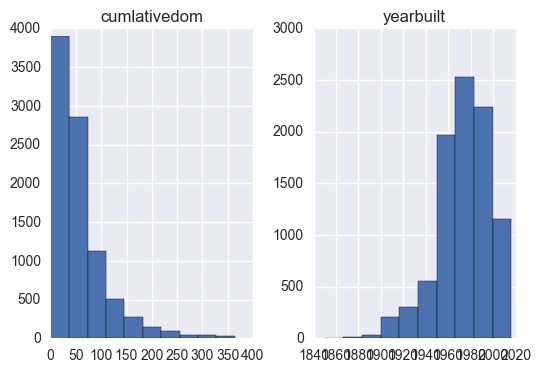

In [178]:
MNSM[['cumlativedom','yearbuilt']].hist()

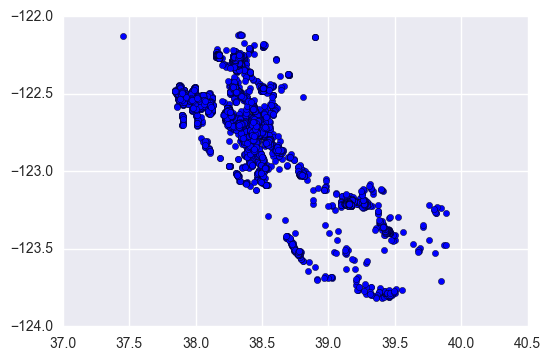

In [180]:
plt.scatter(MNSM.latitude,MNSM.longitude)



In [181]:
MNSM.describe().round().transpose()


,count,mean,std,min,25%,50%,75%,max
mlnumber,8997,2.16176e+07,28168,2.13173e+07,2.16087e+07,2.16149e+07,2.1622e+07,2.17058e+07
listprice,8997,776138,497588,100000,465000,624000,899000,3.75e+06
soldprice,8997,773477,489154,100000,465000,620000,900000,2.999e+06
cumlativedom,8997,58,52,0,27,41,72,364
bedrooms,8997,3,1,0,2,3,4,10
bathrooms,8997,2,1,0,2,2,3,8
sqfoot,8997,1775,744,336,1244,1615,2130,9453
lotsize,8997,815,5671,0,0,0,1,435600
latitude,8997,38,0,37,38,38,38,40
longitude,8997,-123,0,-124,-123,-123,-123,-122


### Grouping by County and City

In [182]:
MNSM[['soldprice','pricepersqft','county','sqfoot','bedrooms','bathrooms','cumlativedom','yearbuilt']].groupby('county').mean().round(1)

,soldprice,pricepersqft,sqfoot,bedrooms,bathrooms,cumlativedom,yearbuilt
county,,,,,,,
Marin,1127547.8,601.8,1908.1,3.1,2.5,46.5,1966.7
Mendocino,412437.2,263.2,1634.2,2.8,2.0,85.8,1973.0
Napa,735226.4,420.7,1797.5,3.1,2.3,67.2,1972.4
Sonoma,645168.4,382.4,1715.6,3.0,2.3,57.9,1977.1


In [183]:
MNSM[['soldprice','pricepersqft','cityname','sqfoot','bedrooms','bathrooms','cumlativedom','yearbuilt', 'county']].groupby(['county','cityname']).mean().round(1)

soldprice  pricepersqft  sqfoot  bedrooms  \
county    cityname                                                       
Marin     Belvedere          2229336.0        1063.5  2166.5       3.3   
          Bolinas            1550166.7        1120.6  1383.2       2.3   
          Corte Madera       1256503.4         720.6  1805.6       3.2   
          Dillon Beach        921576.9         481.7  1972.9       2.9   
          Fairfax             957490.9         599.0  1652.3       3.0   
          Forest Knolls       841857.1         463.2  1864.0       2.9   
          Greenbrae          1217593.9         670.5  1776.1       2.9   
          Inverness          1235757.8         670.1  1907.4       3.0   
          Kentfield          1683920.2         790.0  2180.5       3.5   
          Lagunitas           860562.2         637.6  1456.7       2.2   
          Larkspur           1553663.6         848.4  1813.3       3.0   
          Marshall            985745.5        1067.2  1065.0       2.0   
          Mill Valley        1509860.9         755.7  2039.2       3.2   
          Muir Beach         1850000.0         747.5  2464.0       2.5   
          Nicasio            1075000.0         618.5  2140.2       2.5   
          Novato              810758.7         426.2  1960.7       3.3   
          Petaluma            825000.0         319.4  2583.0       3.0   
          Pt. Reyes Station  1167906.2         665.6  1991.4       2.8   
          Ross               2315919.4         937.0  2492.6       3.8   
          San Anselmo        1259582.9         658.6  1967.0       3.2   
          San Geronimo       1608000.0         604.2  2619.0       3.3   
          San Rafael          958793.1         526.8  1830.2       3.1   
          Sausalito          1273778.8         748.3  1680.9       2.6   
          Stinson Beach      1839081.6        1286.3  1444.9       2.0   
          Tiburon            1792255.0         882.0  2074.2       3.2   
          Woodacre            693888.9         433.5  1757.9       2.9   
Mendocino Albion              537600.0         384.7  1489.0       2.1   
          Boonville           965000.0         616.0  1637.5       2.5   
          Caspar              570000.0         271.4  2100.0       3.0   
          Comptche           1410000.0         850.0  2200.0       2.5   
...                                ...           ...     ...       ...   
Sonoma    Bodega Bay          858294.6         457.6  1919.6       2.7   
          Boyes Hot Springs   680000.0         541.4  1256.0       2.0   
          Calistoga          1118333.3         542.1  2209.0       2.7   
          Camp Meeker         287222.2         309.1   923.7       1.9   
          Cazadero            417174.9         394.1  1118.5       2.1   
          Cloverdale          508572.9         302.0  1727.0       2.9   
          Cotati              547283.1         348.3  1566.3       3.0   
          Duncans Mills       487750.0         628.5   776.0       2.0   
          El Verano           406000.0         505.0   804.0       2.0   
          Forestville         514849.7         382.5  1386.7       2.5   
          Geyserville        1149550.0         499.9  2190.9       3.3   
          Glen Ellen         1178285.9         610.9  2038.6       2.9   
          Graton              706000.0         510.6  1386.5       2.8   
          Guerneville         397795.8         368.4  1158.5       2.2   
          Healdsburg          950295.7         541.2  1799.5       2.9   
          Jenner              661500.0         504.8  1337.0       3.0   
          Kenwood            1133138.9         566.6  2019.5       2.9   
          Monte Rio           488130.4         480.9  1158.9       2.2   
          Occidental          837914.3         452.6  1845.5       2.5   
          Penngrove           921464.3         437.7  2164.6       3.4   
          Petaluma            694518.5         398.6  1831.3       3.3   
          Rio Nido            303

### Most Common Home Types by Bed:Bath ratio and price per sq foot 

bathrooms  0    1     2     3    4   5
bedrooms                              
0          3    4     2     0    0   0
1          1  194    34     0    0   0
2          0  678  1107   226   14   0
3          0  289  2509  1339  123  11
4          0    6   599  1148  266  45
5          1    1    25   146  105  55
6          0    0     1    14   13   9


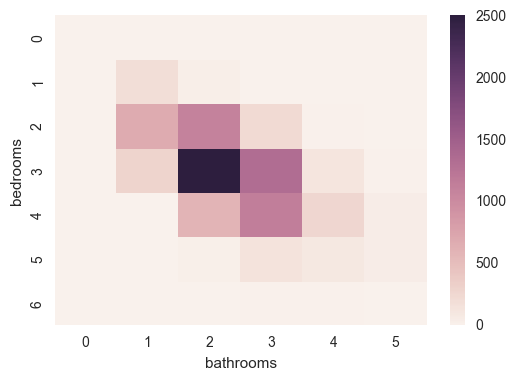

In [184]:
sb.heatmap(pd.crosstab(MNSM.bedrooms, MNSM.bathrooms).loc[:6, :5])
print(pd.crosstab(MNSM.bedrooms, MNSM.bathrooms).loc[:6, :5])

            mean                                                            
bathrooms    0.0         1.0         2.0         3.0         4.0         5.0
bedrooms                                                                    
0.0        802.0  550.000000  378.500000         NaN         NaN         NaN
1.0        235.0  547.902062  511.470588         NaN         NaN         NaN
2.0          NaN  492.607670  452.787715  467.911504  361.285714         NaN
3.0          NaN  445.965398  432.931447  427.824496  497.040650  455.545455
4.0          NaN  382.666667  429.435726  398.194251  469.199248  488.844444
5.0        245.0  326.000000  444.000000  370.273973  426.666667  454.454545
6.0          NaN         NaN  187.000000  290.357143  425.769231  346.000000


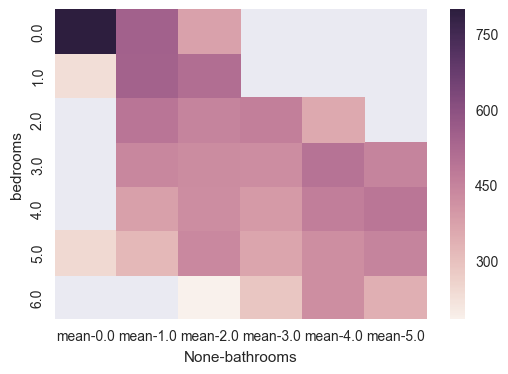

In [185]:
sb.heatmap(pd.crosstab(MNSM[MNSM.bedrooms<7].bedrooms, MNSM[MNSM.bathrooms<6].bathrooms,values=MNSM.pricepersqft.round(), aggfunc=[np.mean]))
print(pd.crosstab(MNSM[MNSM.bedrooms<7].bedrooms, MNSM[MNSM.bathrooms<6].bathrooms,values=MNSM.pricepersqft.round(), aggfunc=[np.mean]))

### Correlating numerical data (Beds, Baths, Sqfoot correlate well with soldprice)

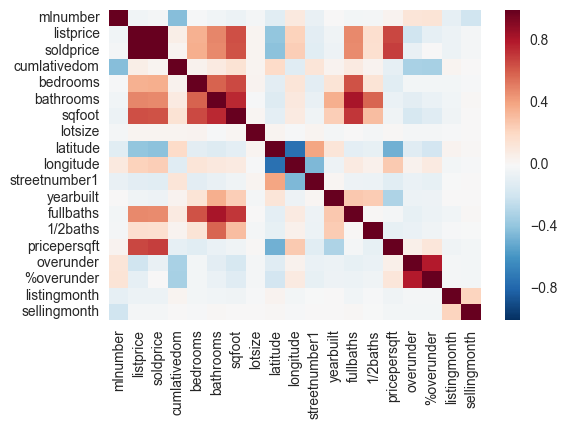

In [186]:
sb.heatmap(MNSM.corr())

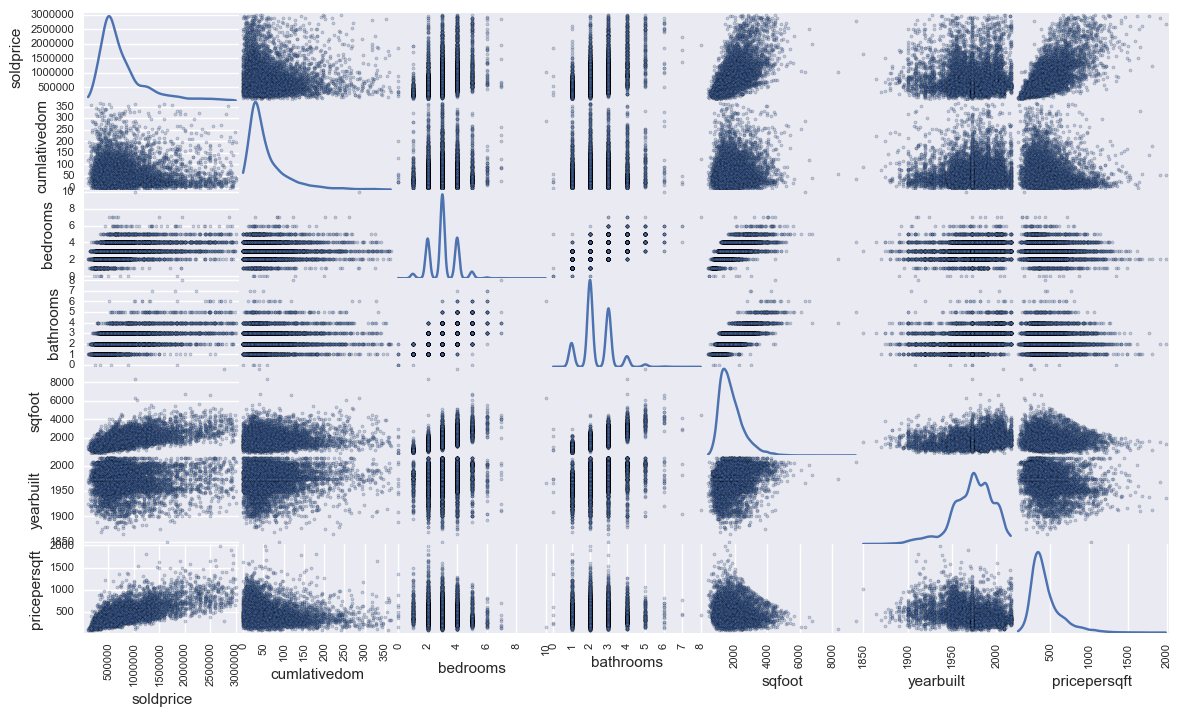

In [187]:
pd.scatter_matrix(MNSM[['soldprice','cumlativedom','bedrooms','bathrooms','sqfoot', 'yearbuilt', 'pricepersqft']], alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Linear Regression Model

In [77]:
MNSM_dummies = MNSM.copy()

In [78]:
MNSM_dummies = MNSM_dummies[['county','cityname','area','soldprice','sqfoot','bedrooms','bathrooms','cumlativedom','yearbuilt']]
MNSM_dummies1 = pd.get_dummies(MNSM_dummies)

In [79]:
MNSM_dummies1.head()

,soldprice,sqfoot,bedrooms,bathrooms,cumlativedom,yearbuilt,county_Marin,county_Mendocino,county_Napa,county_Sonoma,...,area_Sonoma,area_St. Helena,area_Stinson Beach,area_Talmage/Hopland,area_Tiburon,area_Timber Cove,area_Ukiah,area_Willits,area_Windsor,area_Yountville
856,643000,1440.0,3,2,299,1922.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
879,1340625,2133.0,4,3,295,1967.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
901,988000,1651.0,3,3,264,2015.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
914,253000,772.0,1,1,245,1991.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
916,2580000,3382.0,4,4,47,2016.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
